In [2]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [4]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [5]:
sample_sales_data = [
    ('pastry', 10, 25),
    ('pancake', 5, 100),
    ('cake', 8, 400),
    ('cheesecake', 7, 800),
    ('croissant', 4, 150),
    ('cold coffee', 6, 250),
    ('donut',12, 90)
]

In [6]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_sales_data)
conn.commit()

In [7]:
query = """
SELECT product, 
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [8]:
df = pd.read_sql_query(query, conn)

In [9]:
df

,product,total_qty,revenue
0,cake,8,3200.0
1,cheesecake,7,5600.0
2,cold coffee,6,1500.0
3,croissant,4,600.0
4,donut,12,1080.0
5,pancake,5,500.0
6,pastry,10,250.0


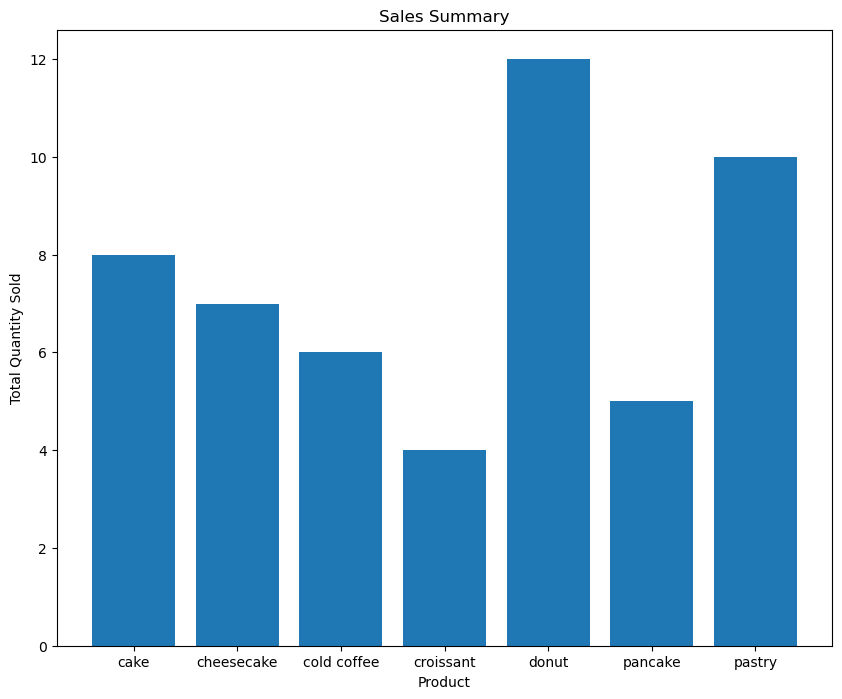

In [10]:
# Plot bar chart
plt.figure(figsize = (10,8))
plt.bar(df['product'], df['total_qty'])
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title('Sales Summary')
plt.show()

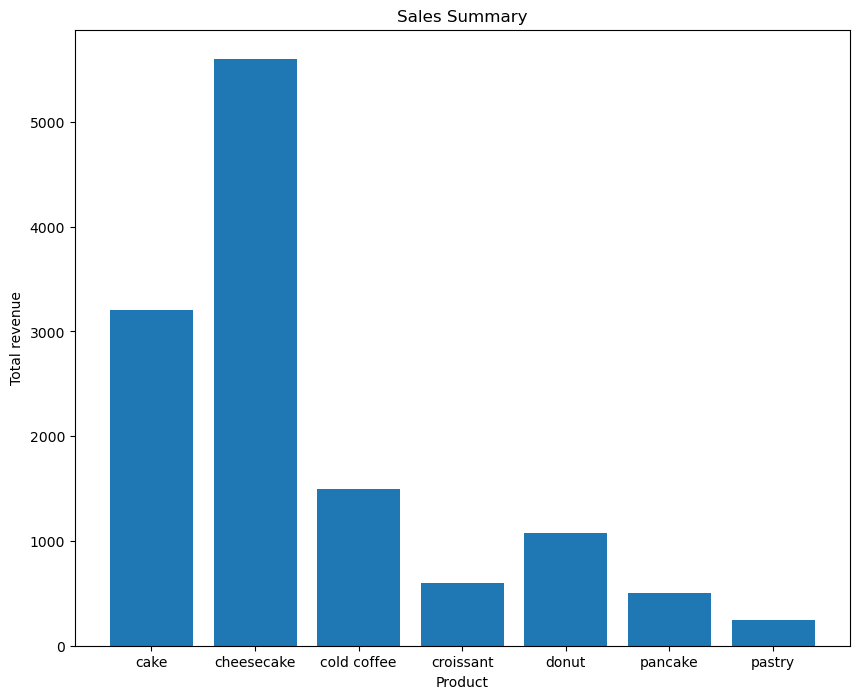

In [11]:
# Plot bar chart
plt.figure(figsize = (10,8))
plt.bar(df['product'], df['revenue'])
plt.xlabel('Product')
plt.ylabel('Total revenue')
plt.title('Sales Summary')
plt.show()